# Get Error of EMS Predictions

1. Get all models 
2. Train model
3. Predict on testset
4. Calc Errors

In [1]:
%load_ext autoreload
%autoreload 2

#!pip install -r requirements.txt --user
#!pip install plotly
#!pip install matplotlib
#!pip install seaborn

In [1]:
# change current directory to the project directory
import os
#os.chdir('/home/mrks/linux-Documents/efficientIO')
os.chdir('C:/Users/GMark/Documents/efficientIO')


# environment setup
os.environ["CLUSTER_NAME"] = "bms"
os.environ["DB_USER"] = "TSaPh3WxR99FY8W0O7HQYs85D4JMpnFm"
os.environ["DB_PASS"] = "PQmkMtppq28myb5sevye3lvWCkmLh19O"
os.environ["DB_ADDR"] = "localhost"
os.environ["DB_PORT"] = "5432"
os.environ["DB_NAME"] = "lynus"
os.environ["DB_MODE"] = "disable"
os.environ['S3_ENDPOINT'] = "sos-at-vie-1.exo.io"
os.environ['S3_ACCESS_KEY'] = "EXO865e79270e7bf9bcebc0e587"
os.environ['S3_SECRET_KEY'] = "SBs7m9_0tUzcKI4FMouFrxkBZeCH_D2l8a82_RFMfms"
os.environ['S3_SECURE'] = "1"
os.environ["EMPA_ADDR"] = "http://127.0.0.1:9000/"
os.environ['WEATHER_API_KEY'] = ""
os.environ['EMS-NG'] = "ccc"


In [2]:
import psycopg
import pandas as pd

# Get DB connection and all EMS models

try:
    # Establish a connection to the PostgreSQL database
    connection = psycopg.connect(
        dbname=os.environ["DB_NAME"],
        user=os.environ["DB_USER"],
        password=os.environ["DB_PASS"],
        host=os.environ["DB_ADDR"],
        port=os.environ["DB_PORT"]
    )

    # Create a cursor object to interact with the database
    cursor = connection.cursor()

    cursor.execute("SELECT models.id as model_id, models.r->'data'->>'type' as model_type, project.name as project_name, models.r->>'project_id' as project_id \
FROM models \
JOIN project ON models.r->>'project_id'= project.id::text \
WHERE models.r -> 'data' ->> 'type' LIKE '%EMS%' \
")
    result = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Get column names
    

except psycopg.Error as e:
    print(f"Unable to connect to the database. Error: {e}")

finally:
    # Close the cursor and connection, regardless of whether the try block succeeds or raises an exception
    if connection:
        cursor.close()
        connection.close()
        print("Connection closed.")

# Convert the result to a Pandas DataFrame
model_df = pd.DataFrame(result, columns=columns)
model_df

Connection closed.


,model_id,model_type,project_name,project_id
0,d9cdab3e-acd9-499b-b53c-05d698b23b95,EMS,Projekt Hammerschmied,673dfecd-87ae-41b4-adc6-bf4a9ec1d31b
1,a2281880-cb84-4705-a09d-f80367bdd342,EMS,Mayrhofer,e51c2607-26db-4106-b5ea-e880014dacba
2,0ed1bfca-b33e-4063-a907-d5ebe85bb622,EMS,Barac Michael,c4f8afbf-2040-4517-95e7-ed7f0d999242
3,4d908d4d-b57d-47e8-ab5a-738326e72be9,EMS,HAPU,b818e25e-2206-4375-bd9d-0099f6e8c3ab
4,660decfe-1fe8-4c3d-b6ea-f29d22697d94,EMS,HAPU,b818e25e-2206-4375-bd9d-0099f6e8c3ab
5,9d79ac11-63df-45ad-82a2-0075652d0506,EMS,Feigl,f2612c04-11b1-4280-957b-bcd7afeefd1d
6,99582f62-bad3-4bbb-8ff6-42d9f0827a1f,EMS,Projekt Kogler,f78d81b3-e56c-4072-b5bd-ca591893463c
7,15334478-785b-4345-8a88-cc748e9abcb7,EMS,Jodlbauer,189e4327-6e6d-4ffb-9c03-09f2cb3fc9e8
8,fd2f03d2-099b-45e3-b300-b01853e06f00,EMS,Brandmoa,32673a79-600a-4644-a67c-4e88e91f75b0
9,d1793fbb-e453-4a38-a37d-235e0111afe1,EMS,Projekt Katzenhofer,9c801c0d-8c2c-4278-a890-f6835690b001


In [8]:
import datetime
from ai.model.ems_model import EmsModel
from ai.preprocessing.ems_preprocessing import preprocess_ems_data, get_ems_features
from ai.interface.model_holder import ModelHolder
from ai.model_holder.ems_model_holder import EmsModelHolder
from ai.utils.train_utils import train_model
from sklearn import svm

# Get start and end time to create train and test set


index = 0
train_duration_weeks = 5

model_id = str(model_df.iloc[index]["model_id"])
model_holder_type = EmsModelHolder
model_holder = ModelHolder.load_model_holder_from_s3(model_id, model_holder_type, model_load=False)

train_model(model_holder, False)

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=9000): Max retries exceeded with url: /data?var=weather.673dfecd_87ae_41b4_adc6_bf4a9ec1d31b.tt&start=1703500706&end=1705919906&type=avg&sample_time=15m&project=673dfecd-87ae-41b4-adc6-bf4a9ec1d31b (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000021051446000>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [14]:
import datetime
from ai.model.ems_model import EmsModel
from ai.preprocessing.ems_preprocessing import preprocess_ems_data, get_ems_features
from ai.interface.model_holder import ModelHolder
from ai.model_holder.ems_model_holder import EmsModelHolder
from sklearn import svm

# Get start and end time to create train and test set


index = 2
train_duration_weeks = 5

model_id = str(model_df.iloc[index]["model_id"])
model_holder_type = EmsModelHolder
model_holder = ModelHolder.load_model_holder_from_s3(model_id, model_holder_type, model_load=False)

end = datetime.datetime.now()
start = datetime.datetime.fromtimestamp(model_holder.get_start())

if (end - start) <= datetime.timedelta(days=14):
    raise ValueError("Too few data (< 14 days) for EMS training!")

if end - start > datetime.timedelta(weeks=train_duration_weeks):
    start = end - datetime.timedelta(weeks=train_duration_weeks)            
end_training = end - datetime.timedelta(weeks=1)

df = model_holder.get_dh().get_data(int(start.timestamp()), int(end_training.timestamp()))
#df = preprocess_ems_data(df, 15, True)

custom_regressor = None
custom_regressor_args = None

# Fit model
#model = EmsModel()
#model.fit(x, y_consumption, y_pv, y_generator, y_grid, y_battery, y_charge,
            #y_house, y_electric, y_pump, y_consumer, y_soc, y_tpow_battery,
            #y_tpow_charge, y_tpow_electric, y_tpow_pump, y_tpow_consumer, recursive)


In [21]:
# create test set and predict

df_test = model_holder.get_dh().get_data(int(end_training.timestamp()), int(end.timestamp()))
#df_test = preprocess_ems_data(df_test, 15, True)

error_dict = model.evaluate(df_test)
error_dict
    
    

{'MAPE': {'y_consumption': 1,
  'y_pv': 0.2876710141306978,
  'y_grid': 1.0,
  'y_battery': 1.0,
  'y_house': 1.0,
  'y_soc': 0.1023343786878781,
  'y_tpow_battery': 0.37844800337902457,
  'mean': 0.6320155512910374},
 'Corr': {'y_consumption': 0.038336171992030176,
  'y_pv': 0.889501938874625,
  'y_grid': 0.500609108126063,
  'y_battery': 0.1944740194486547,
  'y_house': 0.0905731938060897,
  'y_soc': 0.6855313518876628,
  'y_tpow_battery': 0.10665638919624525,
  'mean': 0.42439801402574945}}

In [16]:
error_dict

{'MAPE': {'y_consumption': 1,
  'y_pv': 0.2876710141306978,
  'y_grid': 1.0,
  'y_battery': 1.0,
  'y_house': 1.0,
  'y_soc': 0.1023343786878781,
  'y_tpow_battery': 0.37844800337902457,
  'mean': 0.6320155512910374},
 'Corr': {'y_consumption': 0.038336171992030176,
  'y_pv': 0.889501938874625,
  'y_grid': 0.500609108126063,
  'y_battery': 0.1944740194486547,
  'y_house': 0.0905731938060897,
  'y_soc': 0.6855313518876628,
  'y_tpow_battery': 0.10665638919624525,
  'mean': 0.42439801402574945}}

/tmp/ipykernel_17378/3340921816.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
/tmp/ipykernel_17378/3340921816.py:25: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=model_names, ax=axes[i], y=errors, palette=palette, hue=errors)
/tmp/ipykernel_17378/3340921816.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


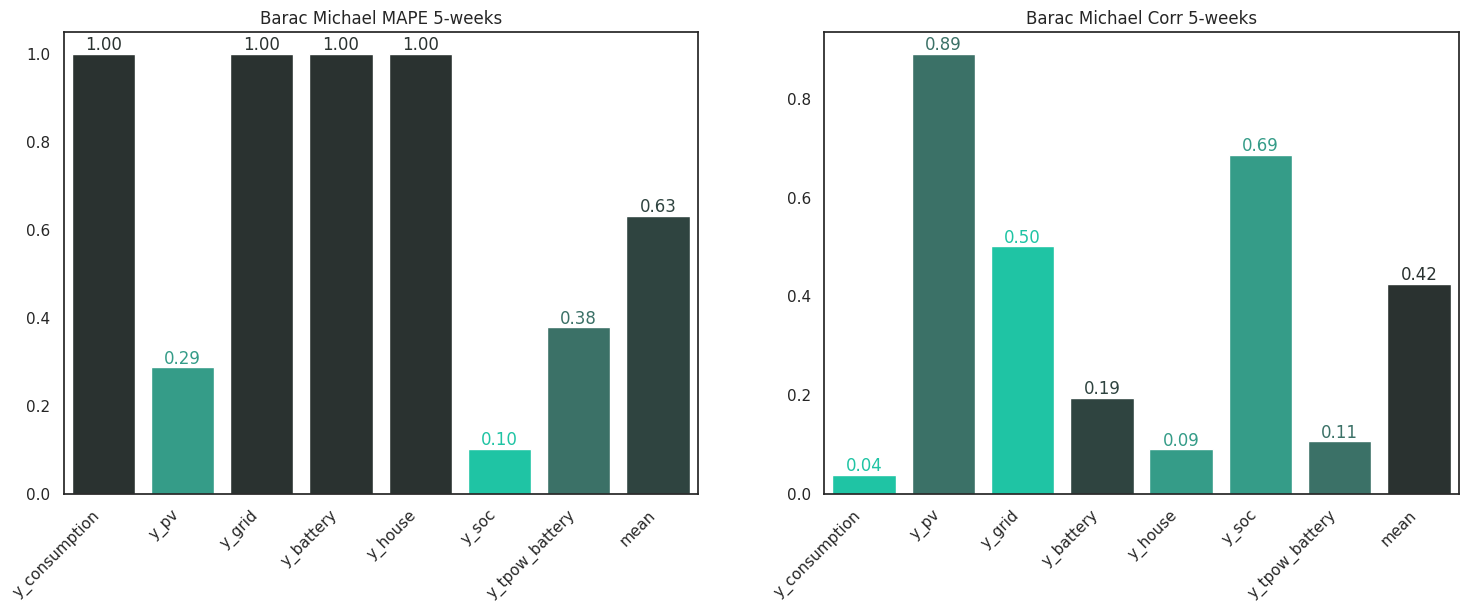

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot errors

fig, axes = plt.subplots(nrows=1, ncols=len(error_dict), figsize=(18, 6), sharey=False)
for i, (key, value) in enumerate(error_dict.items()):
    
    # Extract keys and values from the dictionary
    model_names = list(value.keys())
    errors = list(value.values())

    # Create a bar chart using seaborn
    sns.set(style="white")
    plt.figure(figsize=(10, 6))
    axes[i].set_title(f'{model_df.iloc[index]["project_name"]} {key} {train_duration_weeks}-weeks')
    
    palette = [
'#03e0b5',
'#24AD92',
'#327A6C',
'#2C4742',
'#293331',]
    # You can customize the color palette if needed
    ax = sns.barplot(x=model_names, ax=axes[i], y=errors, palette=palette, hue=errors)
    ax.legend_.remove()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    for p in ax.patches:
        if p.get_width() == p.get_height() == 0:
            continue
        
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), 
        fontsize=12, color=p.get_facecolor(), ha='center', va='bottom')

fig.savefig(f"{model_df.iloc[index]['project_name']}_{model_df.iloc[index]['model_id']}_dur-{train_duration_weeks}.png")
